<a href="https://colab.research.google.com/github/Sherine-6600/DSML-Projects/blob/main/Credit_EDA_%26_Credit_Score_Calculation_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#download the file
!gdown 1YRFkvunh-iSHG8g8sNdUfzb4COrHKwwYbyJ_foiH9EA

Downloading...
From (original): https://drive.google.com/uc?id=1YRFkvunh-iSHG8g8sNdUfzb4COrHKwwYbyJ_foiH9EA
From (redirected): https://docs.google.com/spreadsheets/d/1YRFkvunh-iSHG8g8sNdUfzb4COrHKwwYbyJ_foiH9EA/export?format=xlsx
To: /content/Credit_score.xlsx
13.8MB [00:00, 40.2MB/s]


In [ ]:
# file -> dataframe
df = pd.read_excel('Credit_score.xlsx')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45131
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231


In [ ]:
#info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
#rows, columns
df.shape

(100000, 27)

In [ ]:
#null values
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
#describe df
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,100000,100000,100000,90015,100000,100000,100000,100000.00,100000,88592,92998,100000,100000,100000.00,90970,100000,95521,100000,98800
unique,100000,12500,8,10136,1788,12501,16,18940.00,434,6260,749,3635,4,13178.00,404,3,91049,7,98790
top,0x1602,CUS_0xd40,January,Stevex,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,8,12500,44,2833,5572,7062,16.00,14386,1408,5327,2091,36479,24.00,446,52326,4305,25513,9


# ***Data cleaning - Name, Monthly_Inhand_Salary and Type_of_Loan columns***

In [ ]:
df.columns[df.isna().any()].tolist()

['Name',
 'Monthly_Inhand_Salary',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [ ]:
#handling NaN values in Name, Monthly_Inhand_Salary and Type_of_Loan columns
df['Name'] = df.groupby('Customer_ID')['Name'].ffill().bfill()
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].ffill().bfill()
df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].ffill().bfill()

In [ ]:
df.columns[df.isna().any()].tolist()

['Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [ ]:
df['Monthly_Inhand_Salary'].describe()

,Monthly_Inhand_Salary
count,100000.000000
mean,4198.771619
std,3187.494354
min,303.645417
25%,1626.761667
50%,3096.378333
75%,5961.745000
max,15204.633330


# ***Data cleaning - Type_of_Loan***

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and','')

In [ ]:
df_Type_of_Loan = pd.DataFrame(df['Type_of_Loan'].str.split(',').tolist(), index =df['Customer_ID']).stack().reset_index(level=1, drop=True).to_frame('Type_of_Loan')
df_Type_of_Loan.reset_index(inplace=True)

In [ ]:
df_Type_of_Loan.head()

,Customer_ID,Type_of_Loan
0,CUS_0xd40,Auto Loan
1,CUS_0xd40,Credit-Builder Loan
2,CUS_0xd40,Personal Loan
3,CUS_0xd40,Home Equity Loan
4,CUS_0xd40,Auto Loan


In [ ]:
len(df_Type_of_Loan)

399336

In [ ]:
df_Type_of_Loan.drop_duplicates(inplace=True)

In [ ]:
df_Type_of_Loan.reset_index(drop=True, inplace=True)

In [ ]:
len(df_Type_of_Loan)

45768

In [ ]:
df_Type_of_Loan.head()

,Customer_ID,Type_of_Loan
0,CUS_0xd40,Auto Loan
1,CUS_0xd40,Credit-Builder Loan
2,CUS_0xd40,Personal Loan
3,CUS_0xd40,Home Equity Loan
4,CUS_0x21b1,Credit-Builder Loan


In [ ]:
df_Type_of_Loan['Type_of_Loan'].unique()

array(['Auto Loan', ' Credit-Builder Loan', ' Personal Loan',
       '  Home Equity Loan', 'Credit-Builder Loan', ' Auto Loan',
       '  Not Specified', 'Not Specified', '  Mortgage Loan',
       '  Student Loan', 'Personal Loan', ' Debt Consolidation Loan',
       '  Auto Loan', '  Payday Loan', 'Payday Loan', ' Student Loan',
       '  Personal Loan', ' Payday Loan', ' Home Equity Loan',
       ' Not Specified', ' Mortgage Loan', 'Mortgage Loan',
       'Home Equity Loan', 'Debt Consolidation Loan',
       '  Debt Consolidation Loan', '  Credit-Builder Loan',
       'Student Loan'], dtype=object)

In [ ]:
df_Type_of_Loan['Type_of_Loan'] = df_Type_of_Loan['Type_of_Loan'].str.replace(' ','')

In [ ]:
df_Type_of_Loan['Type_of_Loan'].unique()

array(['AutoLoan', 'Credit-BuilderLoan', 'PersonalLoan', 'HomeEquityLoan',
       'NotSpecified', 'MortgageLoan', 'StudentLoan',
       'DebtConsolidationLoan', 'PaydayLoan'], dtype=object)

In [ ]:
df_Type_of_Loan['Type_of_Loan'].value_counts()/df_Type_of_Loan['Type_of_Loan'].count()

,count
Type_of_Loan,
PaydayLoan,0.114862
Credit-BuilderLoan,0.113748
StudentLoan,0.111694
NotSpecified,0.111672
HomeEquityLoan,0.110426
PersonalLoan,0.110317
DebtConsolidationLoan,0.110077
MortgageLoan,0.109793
AutoLoan,0.107411


In [ ]:
df_Type_of_Loan.groupby('Customer_ID')['Type_of_Loan'].count().reset_index()

,Customer_ID,Type_of_Loan
0,CUS_0x1000,2
1,CUS_0x1009,4
2,CUS_0x100b,5
3,CUS_0x1011,3
4,CUS_0x1013,3
...,...,...
12495,CUS_0xff3,3
12496,CUS_0xff4,4
12497,CUS_0xff6,2
12498,CUS_0xffc,6


In [ ]:
df_loan_count = df_Type_of_Loan.groupby('Customer_ID')['Type_of_Loan'].count().reset_index()
df_loan_count = df_loan_count.rename(columns={'Type_of_Loan': 'Loan_Count'})

In [ ]:
df = df.merge(df_loan_count, on='Customer_ID', how='left')

In [ ]:
df['Loan_Count'].unique()

array([4, 1, 3, 2, 6, 5, 7, 8, 9])

# ***Data cleaning - Num_of_Delayed_Payment***

In [ ]:
condition_payment = df['Num_of_Delayed_Payment'].astype(str).str.contains(r'_',regex=True)
df.loc[condition_payment, 'Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace(r'_', '', regex=True)

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str).str.replace('-','',regex=False)

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [ ]:
df[df['Num_of_Delayed_Payment'].isna()]['Customer_ID'].unique()

array(['CUS_0xd40', 'CUS_0xb891', 'CUS_0x1cdb', ..., 'CUS_0x372c',
       'CUS_0xf16', 'CUS_0x942c'], dtype=object)

In [ ]:
df[df['Customer_ID'] == 'CUS_0xd40']['Num_of_Delayed_Payment'].unique()

array([ 7., nan,  4.,  8.,  6.])

In [ ]:
mode_payment = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
mode_payment = mode_payment.rename(columns={'Num_of_Delayed_Payment': 'Mode_Num_of_Delayed_Payment'})
df = df.merge(mode_payment, on='Customer_ID', how='left')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Mode_Num_of_Delayed_Payment'])
df = df.drop(columns=['Mode_Num_of_Delayed_Payment'])

In [ ]:
df[df['Customer_ID'] == 'CUS_0xd40']['Num_of_Delayed_Payment'].unique()

array([7., 4., 8., 6.])

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [ ]:
df['Num_of_Delayed_Payment'].isna().sum()

0

In [ ]:
df['Num_of_Delayed_Payment'].describe()

,Num_of_Delayed_Payment
count,100000.000000
mean,29.709380
std,218.024582
min,0.000000
25%,9.000000
50%,14.000000
75%,18.000000
max,4397.000000


# ***Data cleaning - Num_Credit_Inquiries***

In [ ]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [ ]:
mode_inquiries = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
mode_inquiries = mode_inquiries.rename(columns={'Num_Credit_Inquiries': 'Mode_Num_Credit_Inquiries'})
df = df.merge(mode_inquiries, on='Customer_ID', how='left')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Mode_Num_Credit_Inquiries'])
df = df.drop(columns=['Mode_Num_Credit_Inquiries'])

In [ ]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)

In [ ]:
df['Num_Credit_Inquiries'].isna().sum()

0

In [ ]:
df['Num_Credit_Inquiries'].describe() #outliers are treated below

,Num_Credit_Inquiries
count,100000.000000
mean,27.321050
std,191.295174
min,0.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,2597.000000


# ***Data cleaning - Amount_invested_monthly***

In [ ]:
df['Amount_invested_monthly'].describe()

,Amount_invested_monthly
count,95521
unique,91049
top,__10000__
freq,4305


In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str).str.replace('__10000__', '0', regex=False)

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('0', np.nan)

In [ ]:
df['Amount_invested_monthly'].describe()

,Amount_invested_monthly
count,95526
unique,91048
top,nan
freq,4479


In [ ]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
mean_invested_monthly = df.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.mean()).reset_index()
mean_invested_monthly = mean_invested_monthly.rename(columns={'Amount_invested_monthly': 'Mean_Amount_invested_monthly'})
df = df.merge(mean_invested_monthly,on = 'Customer_ID', how = 'left')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Mean_Amount_invested_monthly'])
df = df.drop(columns=['Mean_Amount_invested_monthly'])
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [ ]:
df['Amount_invested_monthly'].describe()

,Amount_invested_monthly
count,100000.000000
mean,195.838883
std,195.041842
min,10.010194
25%,74.643382
50%,131.209101
75%,239.479981
max,1977.326102


# ***Data cleaning - Monthly_Balance***

In [ ]:
df['Monthly_Balance'].isna().sum()

1200

In [ ]:
df[df['Monthly_Balance'] == '__-333333333333333333333333333__']['Customer_ID'].unique()

array(['CUS_0x9885', 'CUS_0x5a90', 'CUS_0x288d', 'CUS_0x85e9',
       'CUS_0x2b77', 'CUS_0xc06e', 'CUS_0x57f3', 'CUS_0x41bf',
       'CUS_0x2f7e'], dtype=object)

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan, regex=False)

In [ ]:
df['Monthly_Balance'].isna().sum()

1209

In [ ]:
mean_monthly_balance = df.groupby('Customer_ID')['Monthly_Balance'].apply(lambda x: x.mean()).reset_index()
mean_monthly_balance = mean_monthly_balance.rename(columns={'Monthly_Balance': 'Mean_Monthly_Balance'})
df = df.merge(mean_monthly_balance, on='Customer_ID', how='left')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Mean_Monthly_Balance'])
df = df.drop(columns=['Mean_Monthly_Balance'])
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [ ]:
df['Monthly_Balance'].isna().sum()

0

In [ ]:
df['Monthly_Balance'].describe()

,Monthly_Balance
count,100000.000000
mean,403.120320
std,214.014558
min,0.007760
25%,270.189030
50%,337.114461
75%,471.570652
max,1602.040519


# ***Data cleaning -  Age***

In [ ]:
df[df['Age'].str.contains('-', na=False)]['Age'].unique()

array([], dtype=object)

In [ ]:
#Data cleaning -  Age
df['Age'] = df['Age'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['Age'] = df['Age'].astype(int)
median_age = df.groupby('Customer_ID')['Age'].median().reset_index()
median_age = median_age.rename(columns={'Age': 'Median_Age'})
df = df.merge(median_age, on='Customer_ID')
df['Age'] = df['Median_Age'].astype(int)
df = df.drop(columns=['Median_Age'])

In [ ]:
df[df['Credit_History_Age'].str.startswith('23 Years', na=False)]['Age'].mode()

,Age
0,51


In [ ]:
df.loc[df['Age'] == 267, 'Age'] = 51

In [ ]:
df['Age'].describe()

,Age
count,100000.00000
mean,33.27832
std,10.76523
min,14.00000
25%,24.00000
50%,33.00000
75%,42.00000
max,56.00000


In [ ]:
df['Age_bins'] = pd.cut(df['Age'],bins = [13,25,35,45,60], labels = ['very young','young','middle age','old'])

# ***Data cleaning -  SSN***

In [ ]:
df[~df['SSN'].str.contains('-', na=False)]['SSN'].unique()

array(['#F%$D@*&8'], dtype=object)

In [ ]:
condition = df['SSN'].astype(str).str.contains(r'^\d', regex=True)
df.loc[~condition, 'SSN'] = np.nan

In [ ]:
ssn_mode = df.groupby('Customer_ID')['SSN'].apply(lambda x: x.mode()).reset_index()
ssn_mode = ssn_mode.rename(columns={'SSN': 'Mode_SSN'})
df = df.merge(ssn_mode, on='Customer_ID')
df['SSN'] = df['Mode_SSN']
df = df.drop(columns=['Mode_SSN'])
df = df.drop(columns=['level_1'])

In [ ]:
df[~df['SSN'].str.contains('-', na=False)]['SSN'].unique()

array([], dtype=object)

# ***Data cleaning - Credit_History_Age : Years***

In [ ]:
df['Credit_History_Age'].str.split(' ', expand=True)[0].unique()

array(['22', nan, '26', '27', '17', '18', '30', '31', '32', '14', '15',
       '21', '19', '25', '8', '9', '16', '29', '6', '7', '10', '33', '12',
       '13', '28', '24', '1', '11', '20', '0', '5', '2', '3', '23', '4'],
      dtype=object)

In [ ]:
df['Credit_History_Age_Years'] = df['Credit_History_Age'].str.split(' ', expand=True)[0]

In [ ]:
df['Credit_History_Age_Years'].isna().sum()

9030

In [ ]:
df['Credit_History_Age_Years'] = df.groupby('Customer_ID')['Credit_History_Age_Years'].ffill().bfill()

In [ ]:
df['Credit_History_Age_Years'].isna().sum()

0

# ***Data cleaning - Annual_Income***

In [ ]:
df[df['Annual_Income'].astype(str).str.contains(r'[^\d.]', regex=True)]['Annual_Income'].unique()

array(['34847.84_', '30689.89_', '35547.71_', ..., '16680.35_',
       '37188.1_', '39628.99_'], dtype=object)

In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace('_','')

In [ ]:
df[df['Annual_Income'].astype(str).str.contains(r'[_]', regex=True)]['Annual_Income'].unique()

array([], dtype=object)

In [ ]:
df['Annual_Income'].isna().sum()

0

In [ ]:
df['Annual_Income'].describe()

,Annual_Income
count,100000
unique,13701
top,22434.16
freq,16


In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [ ]:
df['Annual_Income'].describe()

,Annual_Income
count,1.000000e+05
mean,1.764157e+05
std,1.429618e+06
min,7.005930e+03
25%,1.945750e+04
50%,3.757861e+04
75%,7.279092e+04
max,2.419806e+07


# **Data cleaning - Occupation**

In [ ]:
df['Occupation'].unique().tolist()

['Scientist',
 '_______',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [ ]:
df['Occupation'].isna().sum()

0

In [ ]:
df['Occupation'] = df['Occupation'].replace('_______',np.nan)

In [ ]:
df['Occupation'].isna().sum()

7062

In [ ]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].ffill().bfill()

In [ ]:
df['Occupation'].unique().tolist()

['Scientist',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

# ***Data cleaning - Num_Bank_Accounts***

In [ ]:
df['Num_Bank_Accounts'].describe()

,Num_Bank_Accounts
count,100000.000000
mean,17.091280
std,117.404834
min,-1.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,1798.000000


In [ ]:
df.groupby('Customer_ID')['Num_Bank_Accounts'].unique()

,Num_Bank_Accounts
Customer_ID,
CUS_0x1000,[6]
CUS_0x1009,[6]
CUS_0x100b,[1]
CUS_0x1011,[3]
CUS_0x1013,[3]
...,...
CUS_0xff3,[0]
CUS_0xff4,[8]
CUS_0xff6,[5]


In [ ]:
min_accounts = df.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.min()).reset_index()
min_accounts = min_accounts.rename(columns={'Num_Bank_Accounts': 'Min_Num_Bank_Accounts'})
df = df.merge(min_accounts, on='Customer_ID', how='left')

In [ ]:
df['Min_Num_Bank_Accounts'].describe()

,Min_Num_Bank_Accounts
count,100000.000000
mean,5.355680
std,2.595311
min,-1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


In [ ]:
df.loc[df['Min_Num_Bank_Accounts'] <= 0, 'Min_Num_Bank_Accounts'] = 1


In [ ]:
df['Min_Num_Bank_Accounts'].describe()

,Min_Num_Bank_Accounts
count,100000.000000
mean,5.401040
std,2.508472
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


# ***Data cleaning - Num_Credit_Card***

In [ ]:
df['Num_Credit_Card'].describe()

,Num_Credit_Card
count,100000.00000
mean,22.47443
std,129.05741
min,0.00000
25%,4.00000
50%,5.00000
75%,7.00000
max,1499.00000


In [ ]:
df.groupby('Customer_ID')['Num_Credit_Card'].unique()

,Num_Credit_Card
Customer_ID,
CUS_0x1000,[5]
CUS_0x1009,[5]
CUS_0x100b,[4]
CUS_0x1011,[3]
CUS_0x1013,[3]
...,...
CUS_0xff3,"[6, 1168, 363]"
CUS_0xff4,[7]
CUS_0xff6,[6]


In [ ]:
min_credit_card = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.min()).reset_index()
min_credit_card = min_credit_card.rename(columns={'Num_Credit_Card': 'Min_Num_Credit_Card'})
df = df.merge(min_credit_card, on='Customer_ID', how='left')

In [ ]:
df['Min_Num_Credit_Card'].describe()

,Min_Num_Credit_Card
count,100000.000000
mean,5.520720
std,2.067078
min,0.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,10.000000


In [ ]:
df[df['Min_Num_Credit_Card'] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Loan_Count,Age_bins,Credit_History_Age_Years,Min_Num_Bank_Accounts,Min_Num_Credit_Card
4712,0x319e,CUS_0x7ce5,January,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,5,...,NM,0.000000,295.876647,Low_spent_Medium_value_payments,834.491103,1,very young,19,4,0
4713,0x319f,CUS_0x7ce5,February,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,5,...,No,0.000000,349.341571,Low_spent_Medium_value_payments,781.026179,1,very young,20,4,0
4714,0x31a0,CUS_0x7ce5,March,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,5,...,No,0.000000,783.801063,Low_spent_Large_value_payments,336.566687,1,very young,20,4,0
4715,0x31a1,CUS_0x7ce5,April,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,5,...,No,0.000000,90.139469,High_spent_Large_value_payments,1000.228281,1,very young,20,4,0
4716,0x31a2,CUS_0x7ce5,May,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,4,...,No,0.000000,346.935116,Low_spent_Large_value_payments,773.432634,1,very young,20,4,0
4717,0x31a3,CUS_0x7ce5,June,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,4,...,No,0.000000,66.232053,High_spent_Large_value_payments,1024.135697,1,very young,20,4,0
4718,0x31a4,CUS_0x7ce5,July,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,4,...,NM,0.000000,287.429168,Low_spent_Medium_value_payments,842.938582,1,very young,20,4,0
4719,0x31a5,CUS_0x7ce5,August,Singhj,24,954-97-8593,Writer,101912.13,8503.677500,4,...,No,0.000000,411.273667,!@9#%8,719.094083,1,very young,20,4,0
9272,0x4c56,CUS_0x73c2,January,Bartuneks,23,145-67-6657,Mechanic,116721.18,9552.765000,2,...,No,82.914222,430.173236,Low_spent_Small_value_payments,732.189042,1,very young,22,1,0
9273,0x4c57,CUS_0x73c2,February,Bartuneks,23,145-67-6657,Mechanic,116721.18,9552.765000,2,...,No,82.914222,374.296240,High_spent_Large_value_payments,1020.643628,1,very young,22,1,0


In [ ]:
df.loc[df['Min_Num_Credit_Card']==0 , 'Min_Num_Credit_Card'] = 1

In [ ]:
df['Min_Num_Credit_Card'].describe()

,Min_Num_Credit_Card
count,100000.000000
mean,5.521040
std,2.066301
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,10.000000


# ***Data cleaning - Interest_Rate***

In [ ]:
df['Interest_Rate'].isna().sum()

0

In [ ]:
df['Interest_Rate'].describe()

,Interest_Rate
count,100000.000000
mean,72.466040
std,466.422621
min,1.000000
25%,8.000000
50%,13.000000
75%,20.000000
max,5797.000000


In [ ]:
Q1 = df['Interest_Rate'].quantile(0.25)
Q3 = df['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Interest_Rate'] < lower_bound) | (df['Interest_Rate'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Interest_Rate'].median().reset_index()
median_value = median_value.rename(columns={'Interest_Rate': 'Median_Interest_Rate'})

df.loc[df['Interest_Rate'] < lower_bound, 'Interest_Rate'] = np.nan
df.loc[df['Interest_Rate'] > upper_bound, 'Interest_Rate'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Median_Interest_Rate'])
df = df.drop(columns=['Median_Interest_Rate'])

In [ ]:
df['Interest_Rate'].describe()

,Interest_Rate
count,100000.00000
mean,14.53208
std,8.74133
min,1.00000
25%,7.00000
50%,13.00000
75%,20.00000
max,34.00000


# ***Data Cleaning - Num_of_Loan***

In [ ]:
df['Num_of_Loan'].describe()

,Num_of_Loan
count,100000
unique,434
top,3
freq,14386


In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace('_','')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace('-','')

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [ ]:
df['Num_of_Loan'].describe() #USE df['Loan_Count'] Column

,Num_of_Loan
count,100000.000000
mean,10.761960
std,61.789933
min,0.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,1496.000000


# ***Data Cleaning - Delay_from_due_date***

In [ ]:
df['Delay_from_due_date'].describe()

,Delay_from_due_date
count,100000.000000
mean,21.068780
std,14.860104
min,-5.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


In [ ]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(str).str.replace('-','')
df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(int)

In [ ]:
df['Delay_from_due_date'].describe()

,Delay_from_due_date
count,100000.000000
mean,21.095040
std,14.822802
min,0.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


# ***Data cleaning - Outstanding_Debt***

In [ ]:
df['Outstanding_Debt'].unique()

array([809.98, 605.03, 1303.01, ..., '3571.7_', 3571.7, 502.38],
      dtype=object)

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [ ]:
df['Outstanding_Debt'].describe()

,Outstanding_Debt
count,100000.000000
mean,1426.220376
std,1155.129026
min,0.230000
25%,566.072500
50%,1166.155000
75%,1945.962500
max,4998.070000


# ***Data cleaning - Changed_Credit_Limit***



In [ ]:
df['Changed_Credit_Limit'].unique()

array([11.27, '_', 6.27, ..., 27.38, 25.16, 21.17], dtype=object)

In [ ]:
df[df['Changed_Credit_Limit'].astype(str).str.contains(r'[^0-9.-]', regex=True)]['Changed_Credit_Limit'].unique()

array(['_'], dtype=object)

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
df[df['Changed_Credit_Limit'].astype(str).str.contains(r'[^0-9.-]', regex=True)]['Changed_Credit_Limit'].unique()

array([nan])

In [ ]:
df['Changed_Credit_Limit'].isna().sum()

2091

In [ ]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].ffill().bfill()

In [ ]:
df['Changed_Credit_Limit'].isna().sum()

0

In [ ]:
df['Changed_Credit_Limit'].describe()

,Changed_Credit_Limit
count,800000.000000
mean,10.389303
std,6.789754
min,-6.490000
25%,5.320000
50%,9.400000
75%,14.860000
max,36.970000


# ***Data cleaning - Credit_History_Age Contd..***

In [ ]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].ffill().bfill()

In [ ]:
df['Credit_History_Age'].isna().sum()

0

In [ ]:
import re
# Function to convert 'XX Years and YY Months' to total years
def convert_to_years(age_str):
    if pd.isna(age_str):
        return np.nan
    # Regular expression to extract years and months
    match = re.match(r'(\d+) Years? and (\d+) Months?', age_str)
    if match:
        years, months = map(int, match.groups())
        return years + months / 12
    # If the format is unexpected, return NaN
    return np.nan

# Apply the conversion function
df['Credit_History_Age_Years'] = df['Credit_History_Age'].apply(convert_to_years)

In [ ]:
df['Credit_History_Age'].describe()

,Credit_History_Age
count,800000
unique,404
top,19 Years and 5 Months
freq,3976


# ***Data cleaning - Payment_of_Min_Amount***

In [ ]:
df.loc[df['Payment_of_Min_Amount'] == 'NM', 'Payment_of_Min_Amount'] = np.nan

In [ ]:
df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].ffill().bfill()

In [ ]:
df['Payment_of_Min_Amount_Catg'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Payment_of_Min_Amount_Catg'].value_counts()/df['Payment_of_Min_Amount_Catg'].count()

,count
Payment_of_Min_Amount_Catg,
1,0.59432
0,0.40568


# ***Data cleaning - Credit_Mix***

In [ ]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].ffill().bfill()

In [ ]:
df['Credit_Mix'].value_counts()/df['Credit_Mix'].count()

,count
Credit_Mix,
Standard,0.45848
Good,0.30384
Bad,0.23768


# ***Visualizations***

In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Loan_Count,Credit_History_Age_Years,Min_Num_Bank_Accounts,Min_Num_Credit_Card,Credit_Mix_Score
count,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,33.278320,1.764157e+05,4198.771619,17.091280,22.474430,14.532080,10.761960,21.095040,29.709380,10.389303,...,1426.220376,32.285173,1403.118217,195.838883,403.120320,3.661440,18.428018,5.401040,5.521040,2.066160
std,10.765183,1.429612e+06,3187.480409,117.404321,129.056845,8.741292,61.789662,14.822737,218.023629,6.789754,...,1155.123972,5.116853,8306.004931,195.040989,214.013621,1.817499,8.306668,2.508461,2.066292,0.732901
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.490000,...,0.230000,20.000000,0.000000,10.010194,0.007760,1.000000,0.083333,1.000000,1.000000,1.000000
25%,24.000000,1.945750e+04,1626.761667,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,...,566.072500,28.052567,30.306660,74.643382,270.189030,2.000000,12.000000,3.000000,4.000000,2.000000
50%,33.000000,3.757861e+04,3096.378333,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,...,1166.155000,32.305784,69.249473,131.209101,337.114461,3.000000,18.250000,5.000000,5.000000,2.000000
75%,42.000000,7.279092e+04,5961.745000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,...,1945.962500,36.496663,161.224249,239.479981,471.570652,5.000000,25.166667,7.000000,7.000000,3.000000
max,56.000000,2.419806e+07,15204.633330,1798.000000,1499.000000,34.000000,1496.000000,67.000000,4397.000000,36.970000,...,4998.070000,50.000000,82331.000000,1977.326102,1602.040519,9.000000,33.666667,10.000000,10.000000,3.000000


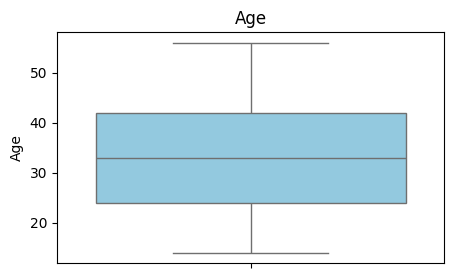

In [ ]:
plt.figure(figsize = (5,3))
sns.boxplot(data =df, y = 'Age', color = 'skyblue')
plt.title('Age')
plt.show()

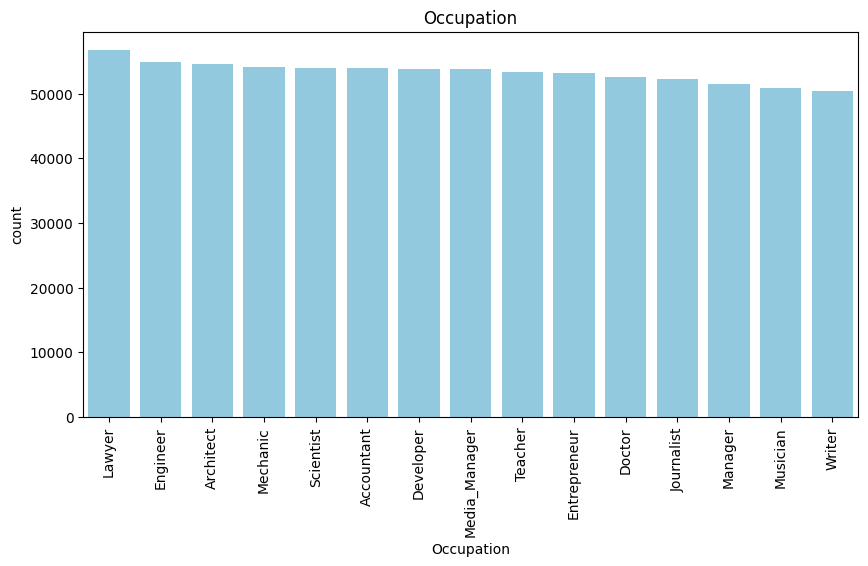

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Occupation')
sns.countplot(data=df, x='Occupation', order = df['Occupation'].value_counts().index, color = 'skyblue')
plt.xticks(rotation=90)
plt.show()

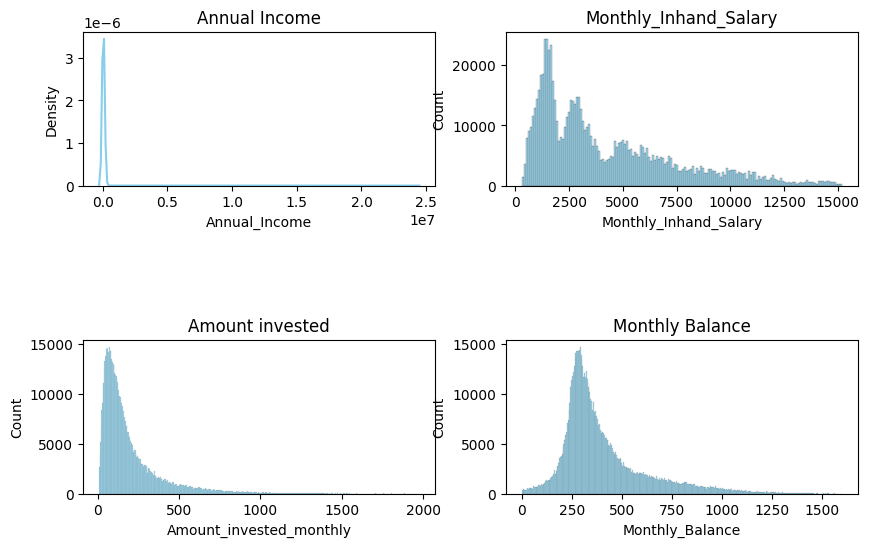

In [ ]:
fig , ax = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=1)

sns.histplot(data=df, x='Monthly_Inhand_Salary', color = 'skyblue', ax = ax[0,1])
ax[0,1].set_title('Monthly_Inhand_Salary')

sns.kdeplot(data=df, x='Annual_Income', color = 'skyblue',ax = ax[0,0])
ax[0,0].set_title('Annual Income')

sns.histplot(data=df, x='Amount_invested_monthly', color = 'skyblue',ax = ax[1,0])
ax[1,0].set_title('Amount invested')

sns.histplot(data=df, x='Monthly_Balance', color = 'skyblue',ax = ax[1,1])
ax[1,1].set_title('Monthly Balance')

plt.show()

Text(0.5, 1.0, 'Monthly Balance')

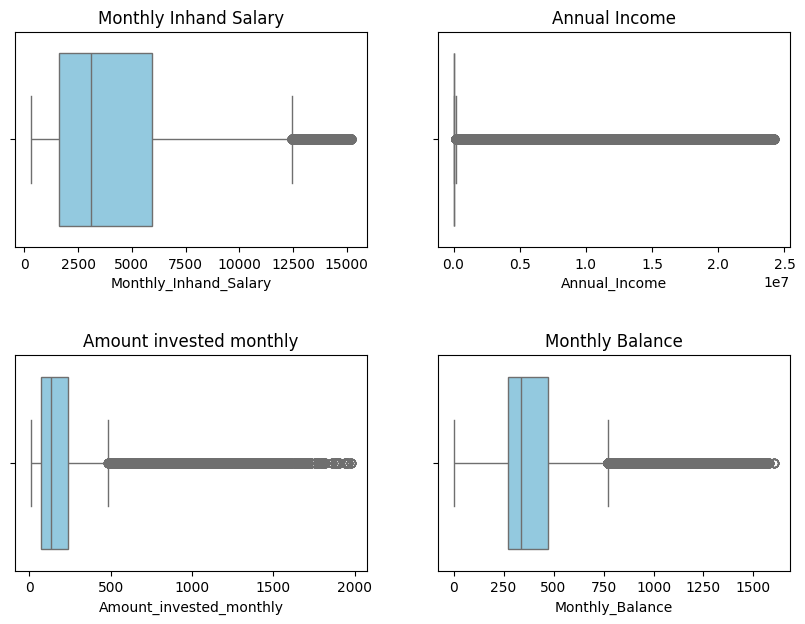

In [ ]:
fig , ax = plt.subplots(2,2, figsize=(10,7))
fig.subplots_adjust(hspace=0.5)

sns.boxplot(data=df, x='Monthly_Inhand_Salary', color = 'skyblue', ax = ax[0,0])
ax[0,0].set_title('Monthly Inhand Salary')

sns.boxplot(data=df, x= 'Annual_Income', color = 'skyblue', ax = ax[0,1])
ax[0,1].set_title('Annual Income')

sns.boxplot(data=df, x='Amount_invested_monthly', color = 'skyblue', ax = ax[1,0])
ax[1,0].set_title('Amount invested monthly')

sns.boxplot(data=df, x= 'Monthly_Balance', color = 'skyblue', ax = ax[1,1])
ax[1,1].set_title('Monthly Balance')

# ***Outliers - Annual_Income, Monthly_Inhand_Salary,Amount_invested_monthly, Monthly_Balance***

In [ ]:
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Annual_Income'] < lower_bound) | (df['Annual_Income'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Annual_Income'].median().reset_index()
median_value = median_value.rename(columns={'Annual_Income': 'Median_Annual_Income'})

df.loc[df['Annual_Income'] < lower_bound, 'Annual_Income'] = np.nan
df.loc[df['Annual_Income'] > upper_bound, 'Annual_Income'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Annual_Income'] = df['Annual_Income'].fillna(df['Median_Annual_Income'])
df = df.drop(columns=['Median_Annual_Income'])

Q1 = df['Monthly_Inhand_Salary'].quantile(0.25)
Q3 = df['Monthly_Inhand_Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Monthly_Inhand_Salary'] < lower_bound) | (df['Monthly_Inhand_Salary'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].median().reset_index()
median_value = median_value.rename(columns={'Monthly_Inhand_Salary': 'Median_Monthly_Inhand_Salary'})

df.loc[df['Monthly_Inhand_Salary'] < lower_bound, 'Monthly_Inhand_Salary'] = np.nan
df.loc[df['Monthly_Inhand_Salary'] > upper_bound, 'Monthly_Inhand_Salary'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Median_Monthly_Inhand_Salary'])
df = df.drop(columns=['Median_Monthly_Inhand_Salary'])

Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount_invested_monthly'] < lower_bound) | (df['Amount_invested_monthly'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Amount_invested_monthly'].median().reset_index()
median_value = median_value.rename(columns={'Amount_invested_monthly': 'Median_Amount_invested_monthly'})

df.loc[df['Amount_invested_monthly'] < lower_bound, 'Amount_invested_monthly'] = np.nan
df.loc[df['Amount_invested_monthly'] > upper_bound, 'Amount_invested_monthly'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Median_Amount_invested_monthly'])
df = df.drop(columns=['Median_Amount_invested_monthly'])

Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Monthly_Balance'] < lower_bound) | (df['Monthly_Balance'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Monthly_Balance'].median().reset_index()
median_value = median_value.rename(columns={'Monthly_Balance': 'Median_Monthly_Balance'})

df.loc[df['Monthly_Balance'] < lower_bound, 'Monthly_Balance'] = np.nan
df.loc[df['Monthly_Balance'] > upper_bound, 'Monthly_Balance'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Median_Monthly_Balance'])
df = df.drop(columns=['Median_Monthly_Balance'])

# ***Visualization - Contd..***

Text(0.5, 1.0, 'Monthly Balance')

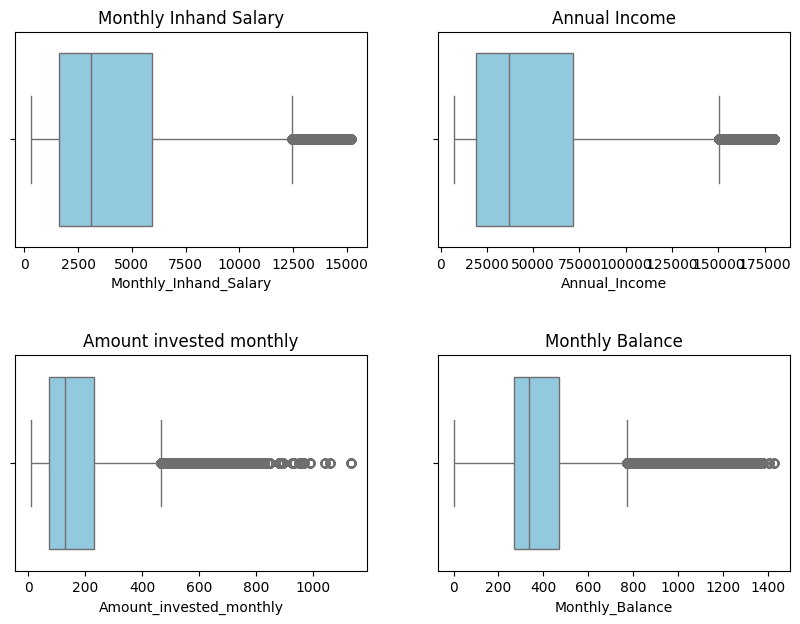

In [ ]:
fig , ax = plt.subplots(2,2, figsize=(10,7))
fig.subplots_adjust(hspace=0.5)

sns.boxplot(data=df, x='Monthly_Inhand_Salary', color = 'skyblue', ax = ax[0,0])
ax[0,0].set_title('Monthly Inhand Salary')

sns.boxplot(data=df, x= 'Annual_Income', color = 'skyblue', ax = ax[0,1])
ax[0,1].set_title('Annual Income')

sns.boxplot(data=df, x='Amount_invested_monthly', color = 'skyblue', ax = ax[1,0])
ax[1,0].set_title('Amount invested monthly')

sns.boxplot(data=df, x= 'Monthly_Balance', color = 'skyblue', ax = ax[1,1])
ax[1,1].set_title('Monthly Balance')

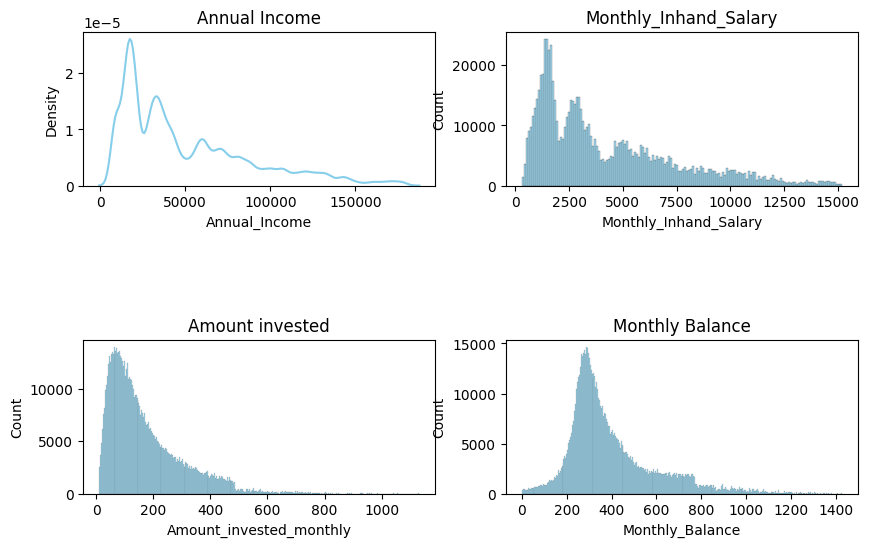

In [ ]:
fig , ax = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=1)

sns.histplot(data=df, x='Monthly_Inhand_Salary', color = 'skyblue', ax = ax[0,1])
ax[0,1].set_title('Monthly_Inhand_Salary')

sns.kdeplot(data=df, x='Annual_Income', color = 'skyblue',ax = ax[0,0])
ax[0,0].set_title('Annual Income')

sns.histplot(data=df, x='Amount_invested_monthly', color = 'skyblue',ax = ax[1,0])
ax[1,0].set_title('Amount invested')

sns.histplot(data=df, x='Monthly_Balance', color = 'skyblue',ax = ax[1,1])
ax[1,1].set_title('Monthly Balance')

plt.show()

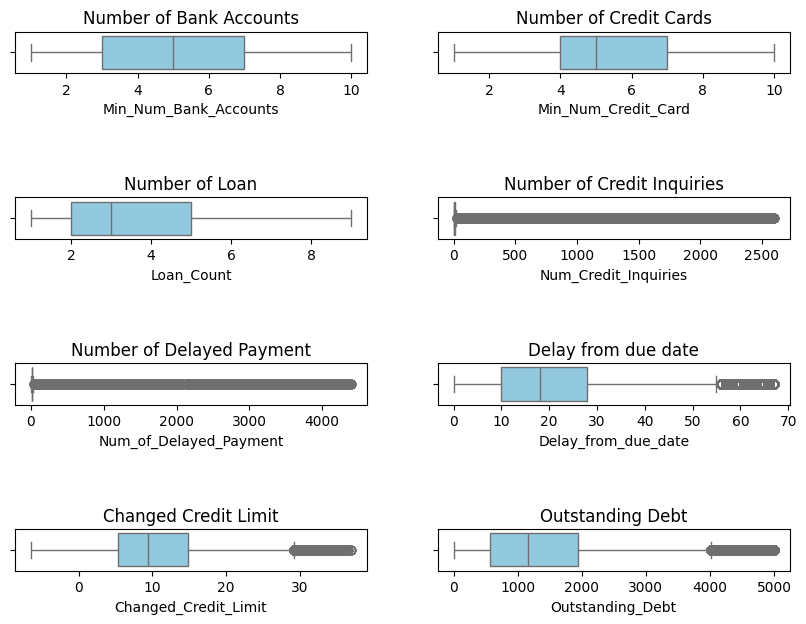

In [ ]:
fig , ax = plt.subplots(4,2, figsize=(10,7))
fig.subplots_adjust(hspace=3)

sns.boxplot(data=df, x='Min_Num_Bank_Accounts', color = 'skyblue', ax = ax[0,0])
ax[0,0].set_title('Number of Bank Accounts')

sns.boxplot(data=df, x= 'Min_Num_Credit_Card', color = 'skyblue', ax = ax[0,1])
ax[0,1].set_title('Number of Credit Cards')

sns.boxplot(data=df, x='Loan_Count', color = 'skyblue', ax = ax[1,0])
ax[1,0].set_title('Number of Loan')

sns.boxplot(data=df, x= 'Num_Credit_Inquiries', color = 'skyblue', ax = ax[1,1])
ax[1,1].set_title('Number of Credit Inquiries')

sns.boxplot(data=df, x='Num_of_Delayed_Payment', color = 'skyblue', ax = ax[2,0])
ax[2,0].set_title('Number of Delayed Payment')

sns.boxplot(data=df, x='Delay_from_due_date', color = 'skyblue', ax = ax[2,1])
ax[2,1].set_title('Delay from due date')

sns.boxplot(data=df, x='Changed_Credit_Limit', color = 'skyblue', ax = ax[3,0])
ax[3,0].set_title('Changed Credit Limit')

sns.boxplot(data=df, x='Outstanding_Debt', color = 'skyblue', ax = ax[3,1])
ax[3,1].set_title('Outstanding Debt')

plt.show()

# **Outliers - Num_Credit_Inquiries, Num_of_Delayed_Payment**

In [ ]:
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().reset_index()
median_value = median_value.rename(columns={'Num_Credit_Inquiries': 'Median_Num_Credit_Inquiries'})

df.loc[df['Num_Credit_Inquiries'] < lower_bound, 'Num_Credit_Inquiries'] = np.nan
df.loc[df['Num_Credit_Inquiries'] > upper_bound, 'Num_Credit_Inquiries'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Median_Num_Credit_Inquiries'])
df = df.drop(columns=['Median_Num_Credit_Inquiries'])

Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Num_of_Delayed_Payment'] < lower_bound) | (df['Num_of_Delayed_Payment'] > upper_bound)]

median_value = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].median().reset_index()
median_value = median_value.rename(columns={'Num_of_Delayed_Payment': 'Median_Num_of_Delayed_Payment'})

df.loc[df['Num_of_Delayed_Payment'] < lower_bound, 'Num_of_Delayed_Payment'] = np.nan
df.loc[df['Num_of_Delayed_Payment'] > upper_bound, 'Num_of_Delayed_Payment'] = np.nan

df = df.merge(median_value, on='Customer_ID', how='left')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Median_Num_of_Delayed_Payment'])
df = df.drop(columns=['Median_Num_of_Delayed_Payment'])


# ***Visualisation - Contd..***

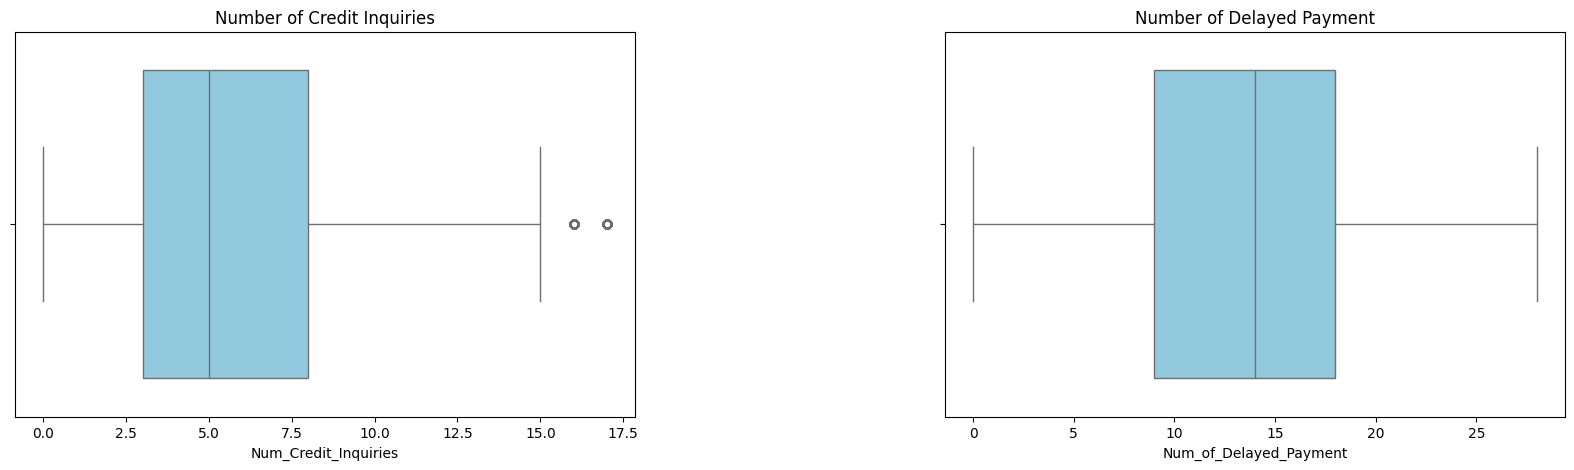

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(data=df, x= 'Num_Credit_Inquiries', color = 'skyblue', ax = ax[0])
ax[0].set_title('Number of Credit Inquiries')

sns.boxplot(data=df, x='Num_of_Delayed_Payment', color = 'skyblue', ax = ax[1])
ax[1].set_title('Number of Delayed Payment')

plt.subplots_adjust(wspace=0.5)

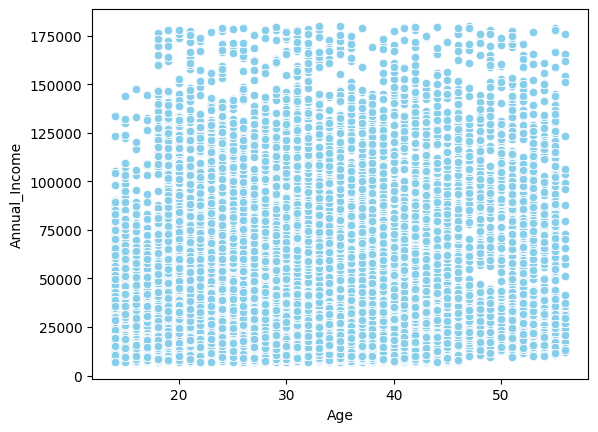

In [ ]:
sns.scatterplot(data=df, x='Age', y='Annual_Income', color = 'skyblue')
plt.show()

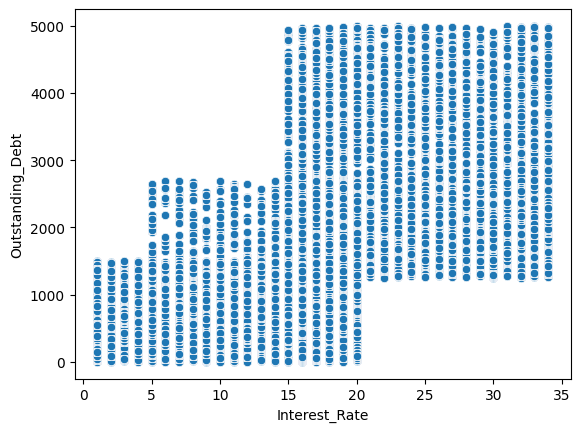

In [ ]:
sns.scatterplot(data=df,x='Interest_Rate', y='Outstanding_Debt' )
plt.show()

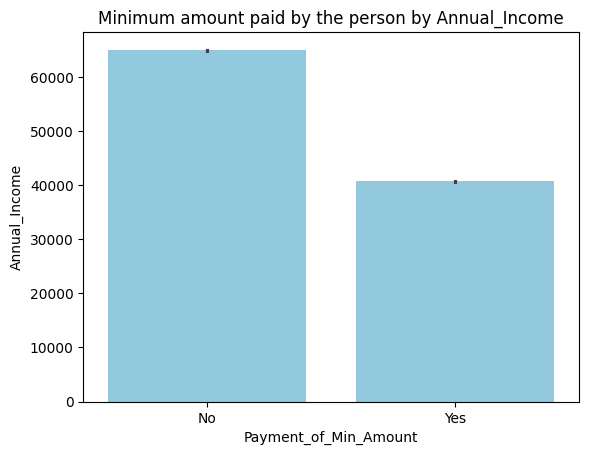

In [ ]:
plt.title('Minimum amount paid by the person by Annual_Income')
sns.barplot(data=df,y='Annual_Income', x='Payment_of_Min_Amount', color='skyblue' )
plt.show()


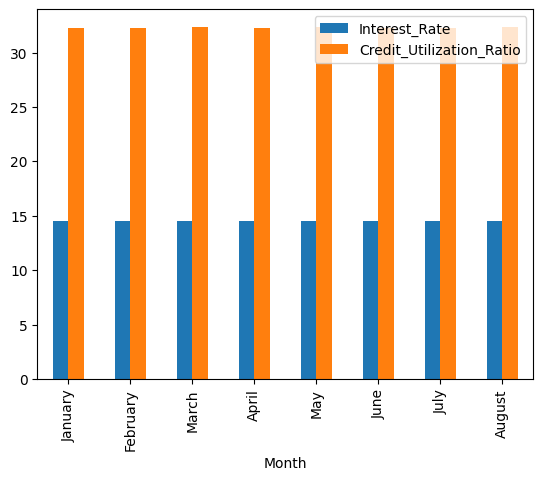

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
mean_credit = df.groupby('Month')[['Interest_Rate', 'Credit_Utilization_Ratio']].mean()
mean_credit = mean_credit.reindex(month_order)
mean_credit.plot(kind='bar')
plt.show()

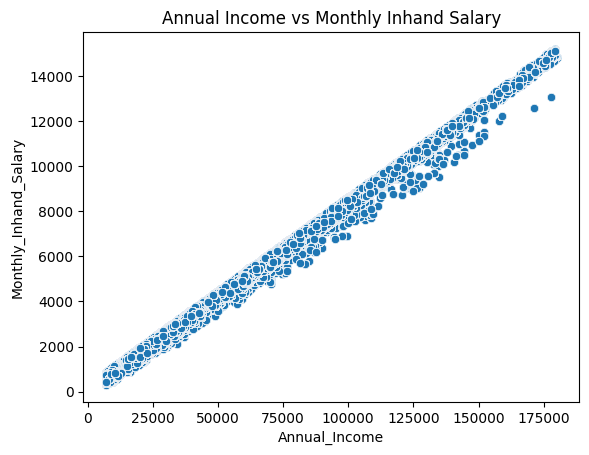

In [ ]:
sns.scatterplot(data=df, x='Annual_Income', y='Monthly_Inhand_Salary')
plt.title('Annual Income vs Monthly Inhand Salary')
plt.show()

# ***Data cleaning - Payment_Behaviour***

In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
df.loc[df['Payment_Behaviour']=='!@9#%8', 'Payment_Behaviour'] = np.nan

In [ ]:
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].ffill().bfill()

In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

# ***Visualisation - Contd..***

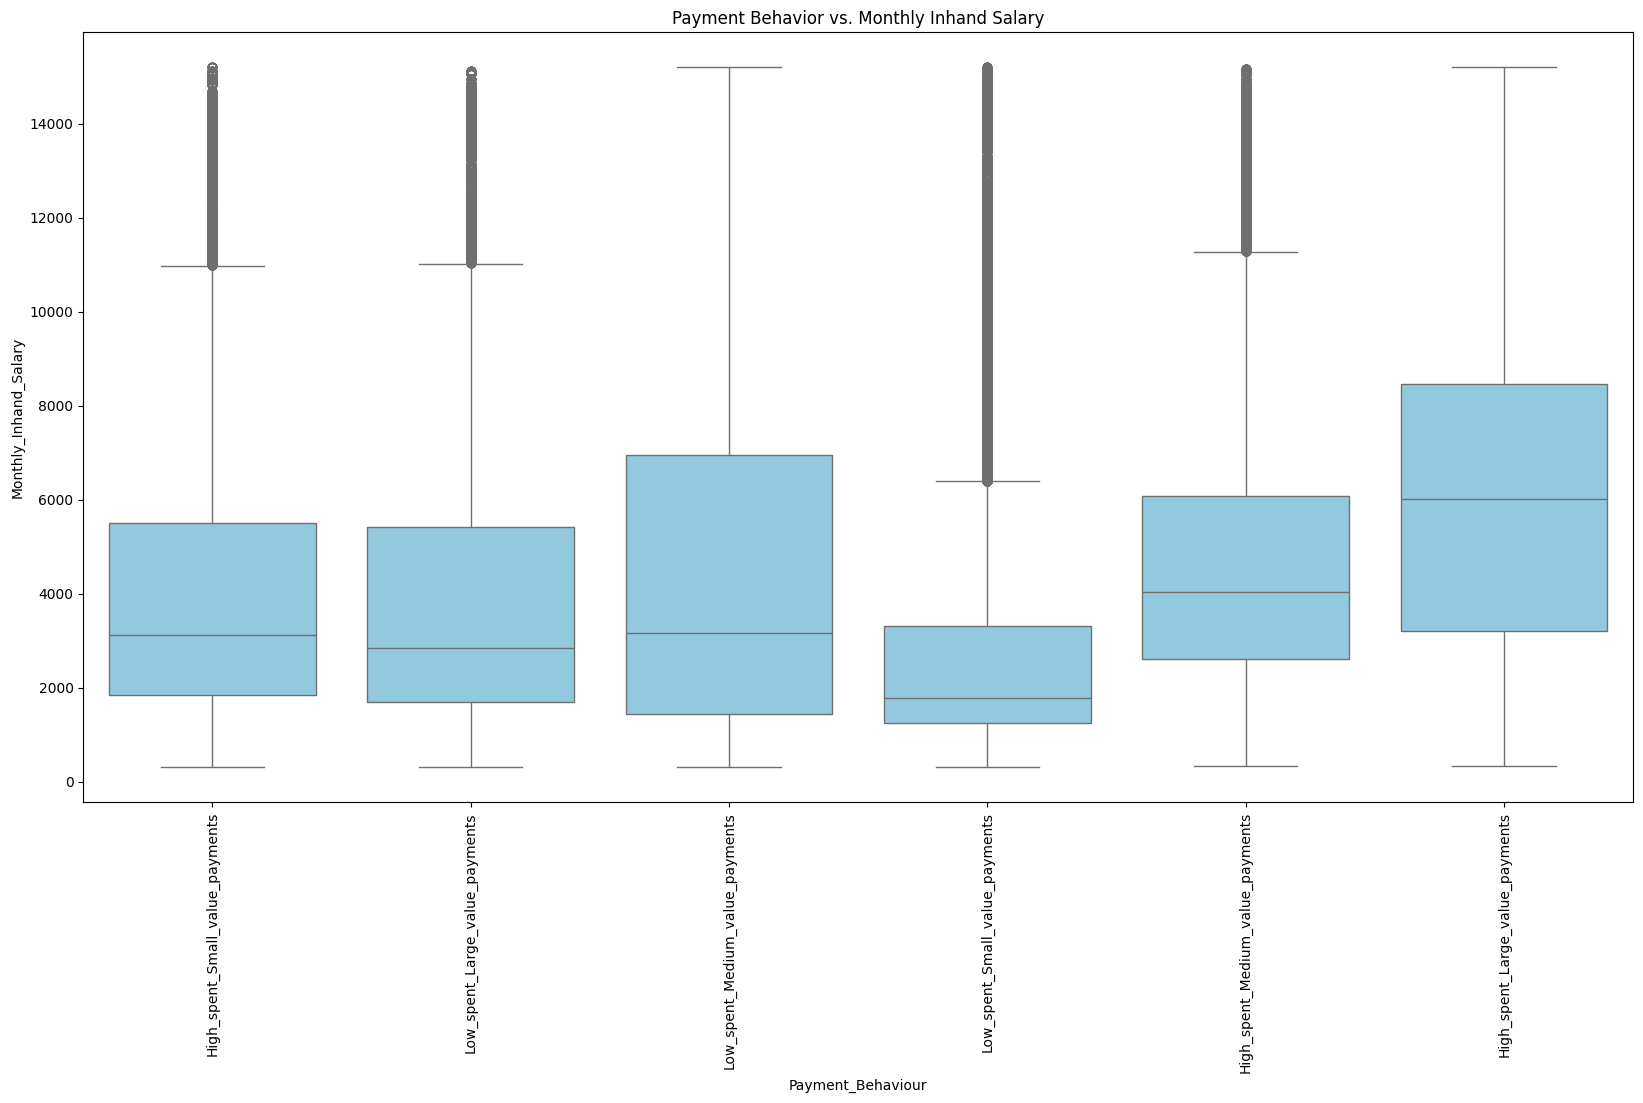

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='Payment_Behaviour', y='Monthly_Inhand_Salary', color='skyblue')
plt.title('Payment Behavior vs. Monthly Inhand Salary')
plt.xticks(rotation=90)
plt.show()

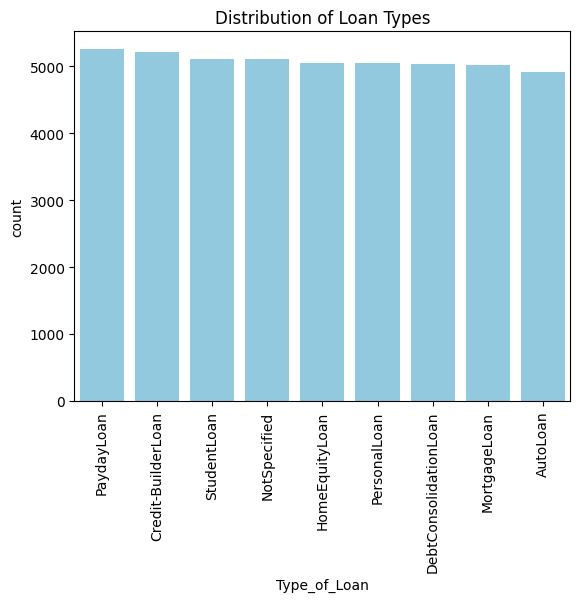

In [ ]:
sns.countplot(data=df_Type_of_Loan, x='Type_of_Loan', color='skyblue', order = df_Type_of_Loan['Type_of_Loan'].value_counts().index)
plt.title('Distribution of Loan Types')
plt.xticks(rotation=90)
plt.show()

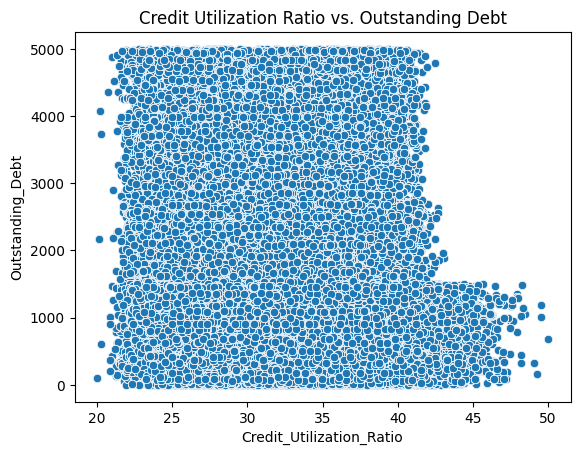

In [ ]:
sns.scatterplot(data=df, x='Credit_Utilization_Ratio', y='Outstanding_Debt')
plt.title('Credit Utilization Ratio vs. Outstanding Debt')
plt.show()

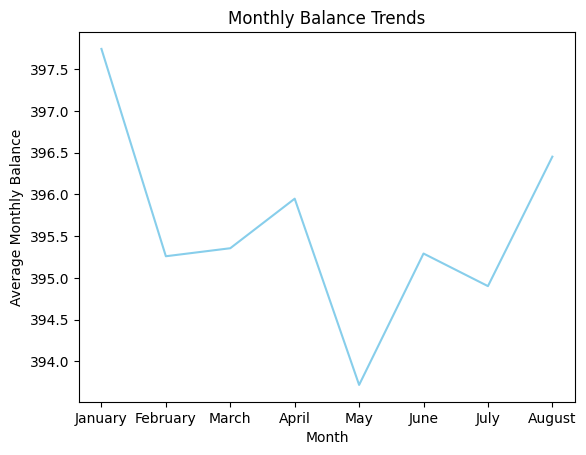

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
# Group by 'Month' and calculate the mean of 'Monthly_Balance'
mean_balance_by_month = df.groupby('Month')['Monthly_Balance'].mean()

# Sort the mean balance by the defined month order
mean_balance_by_month = mean_balance_by_month.reindex(month_order)

# Plot the data
mean_balance_by_month.plot(color='skyblue')

# Set plot title and labels
plt.title('Monthly Balance Trends')
plt.xlabel('Month')
plt.ylabel('Average Monthly Balance')

# Show plot
plt.show()

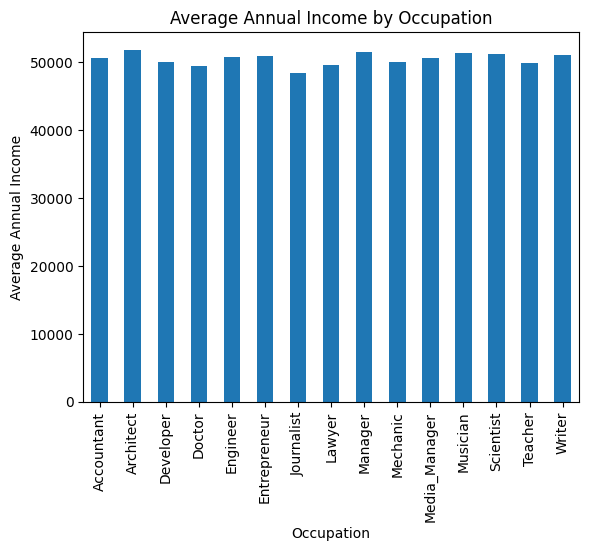

In [ ]:
df.groupby('Occupation')['Annual_Income'].mean().plot(kind='bar')
plt.title('Average Annual Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.show()

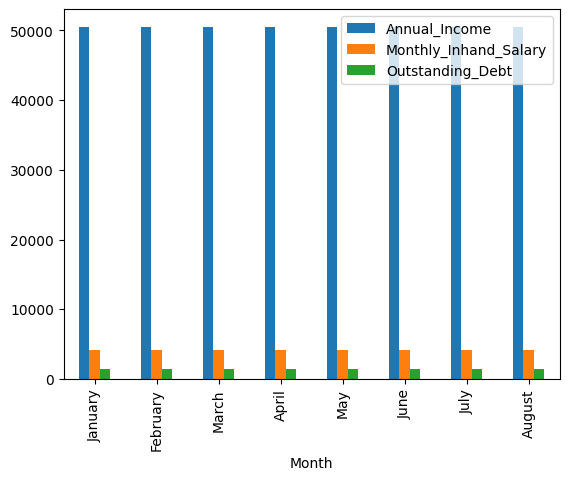

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
mean_finance = df.groupby('Month')[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']].mean()
mean_finance = mean_finance.reindex(month_order)
mean_finance.plot(kind='bar')
plt.show()

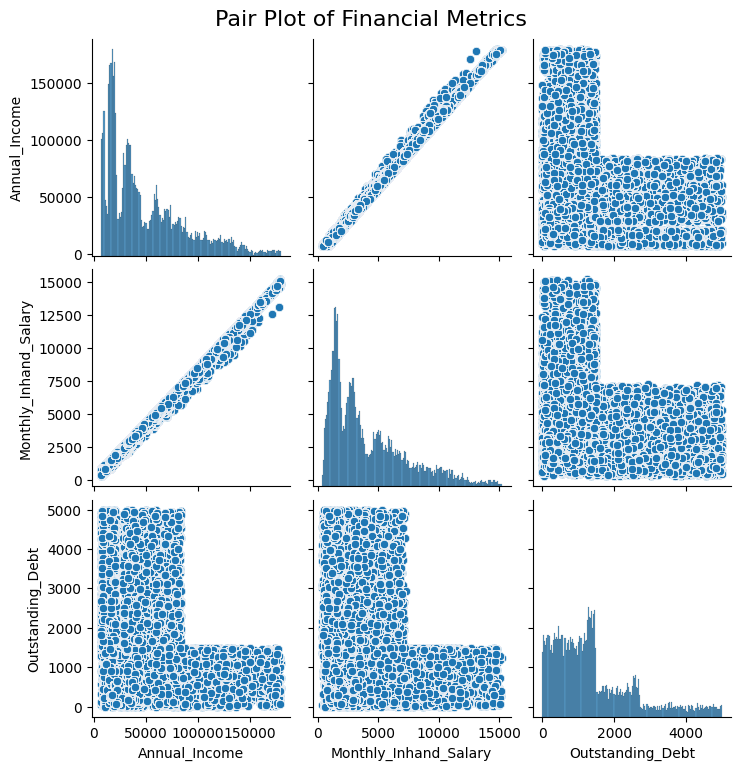

In [ ]:
sns.pairplot(df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']])
plt.suptitle('Pair Plot of Financial Metrics', y=1.02, fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
df_encoded = df.copy()
df_encoded.drop(columns=['Age_bins'], inplace=True)
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

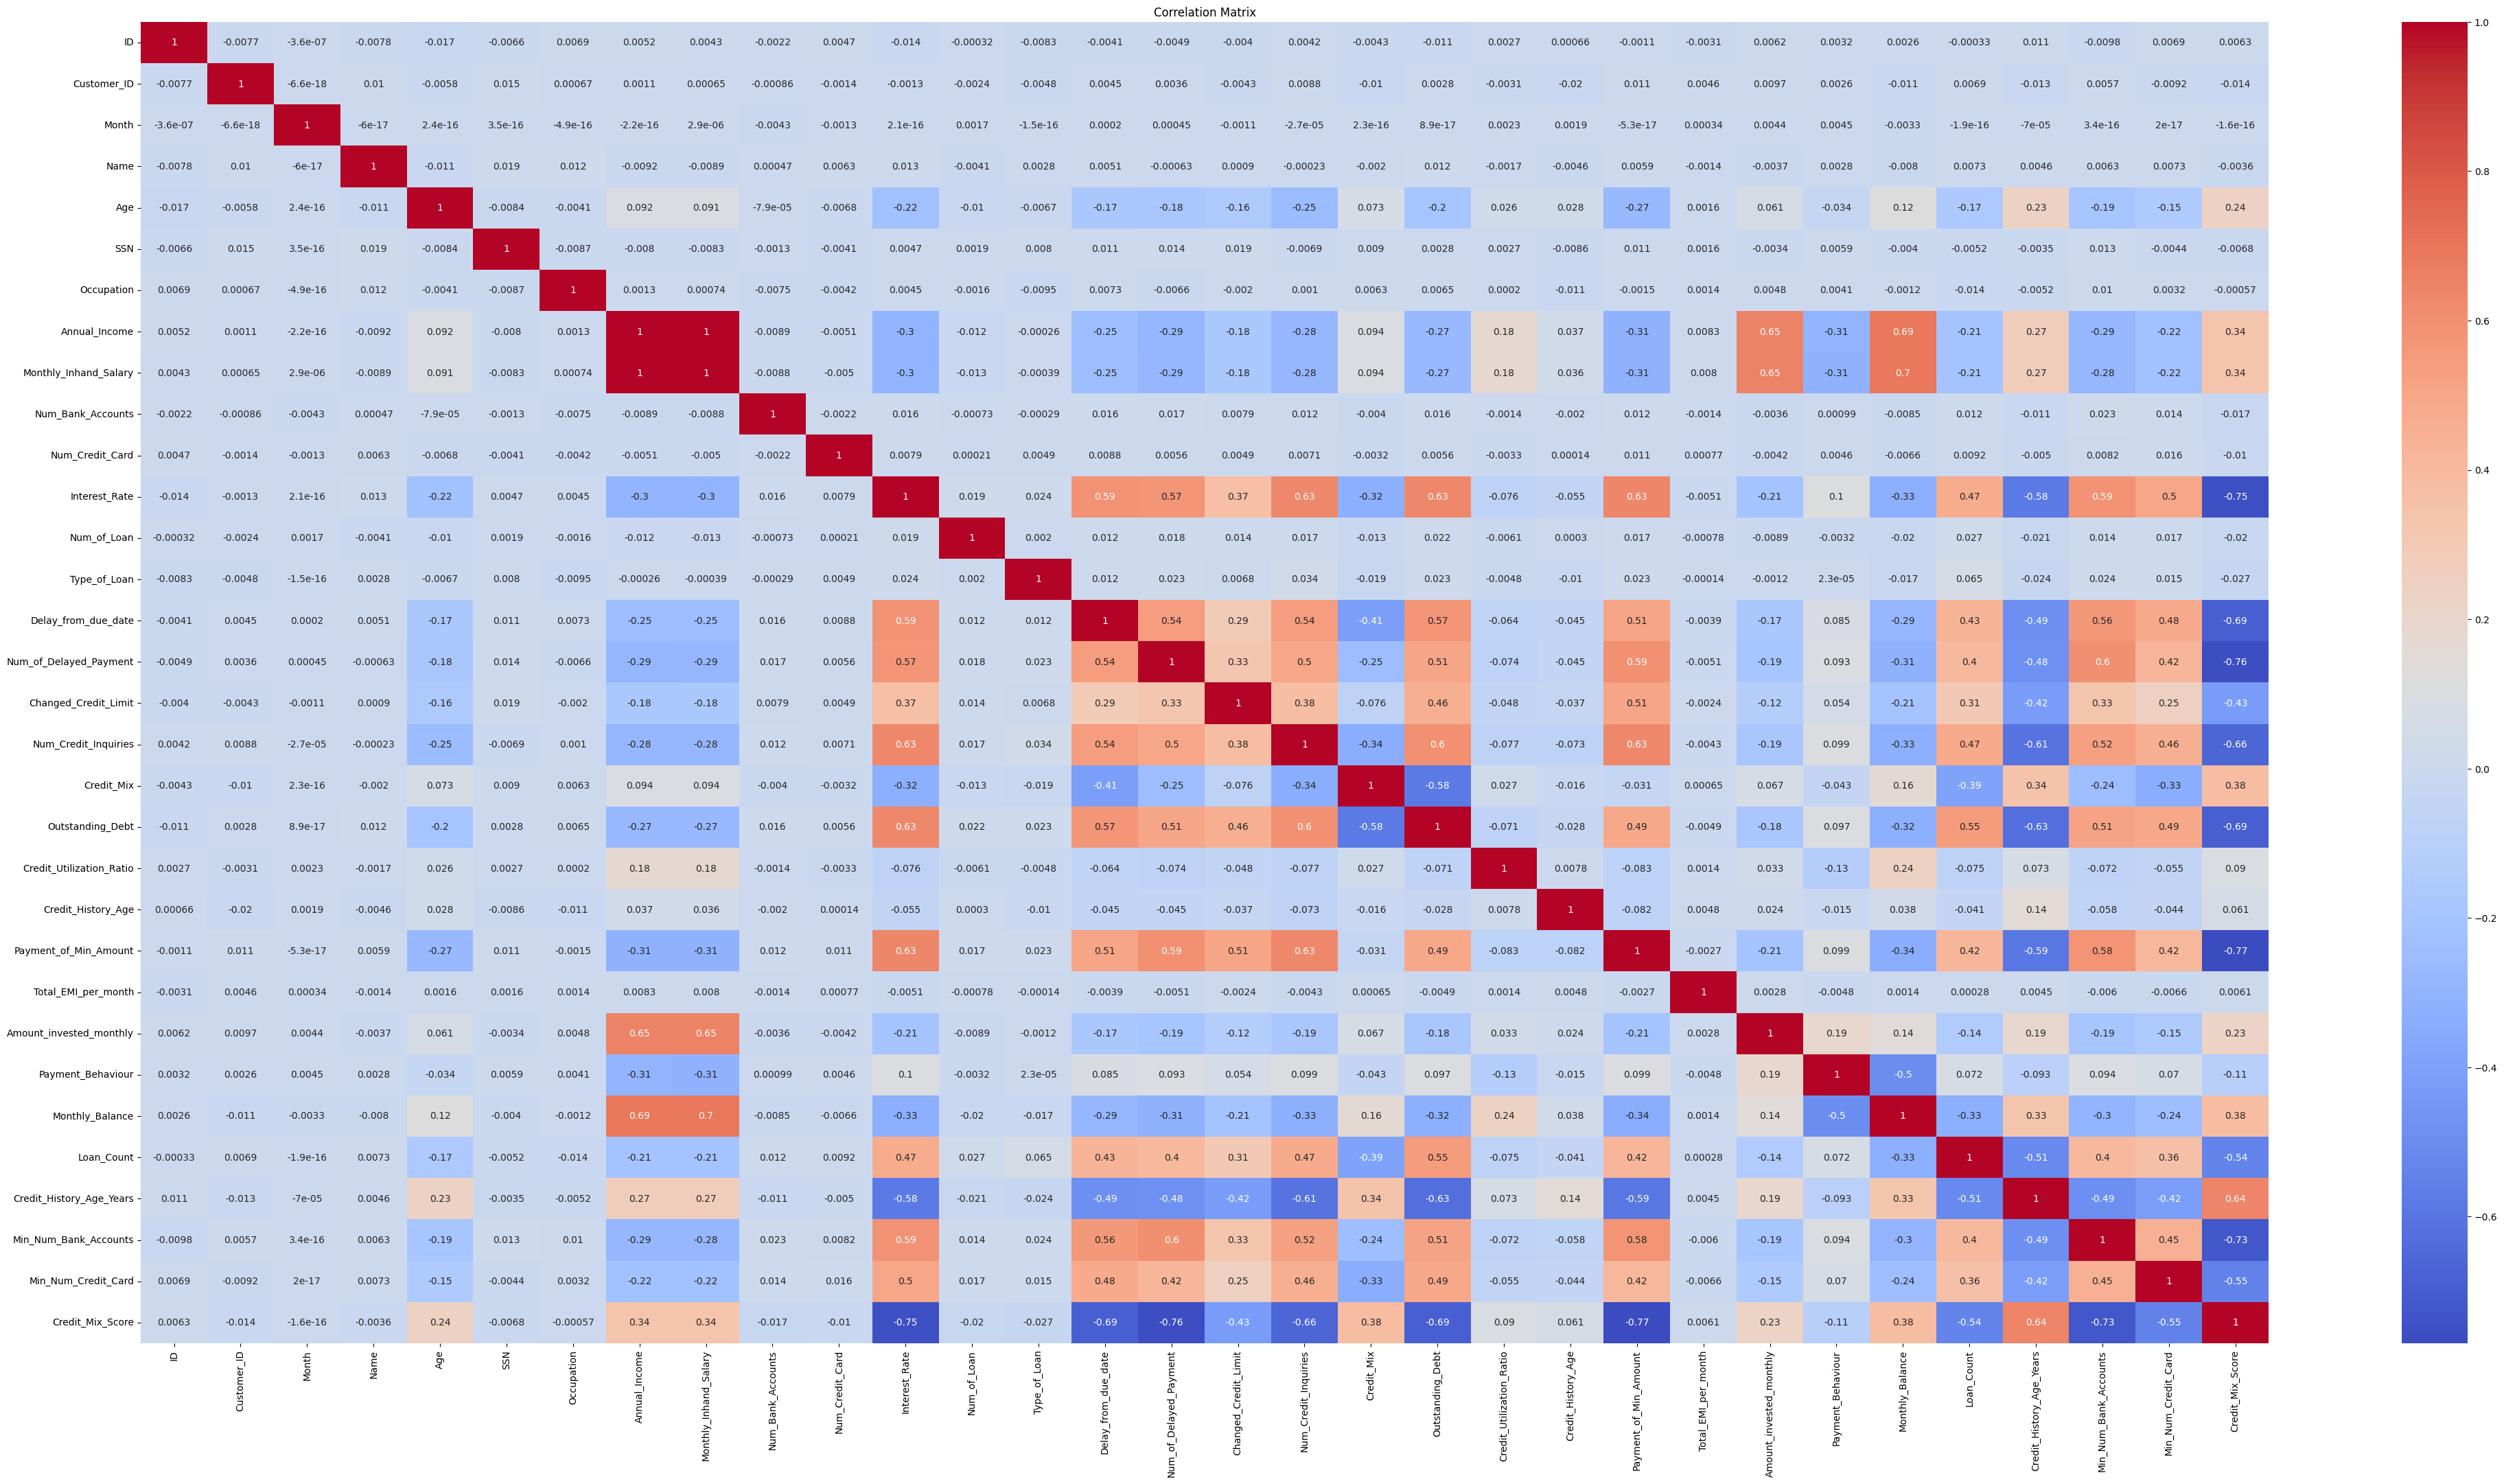

In [ ]:
plt.figure(figsize=(50,25))
plt.title('Correlation Matrix')
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

# ***Feature Engineering***

# *Credit_Mix_Score*

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Credit_Mix'])

In [ ]:
df_encoded.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour,Monthly_Balance,Loan_Count,Age_bins,Credit_History_Age_Years,Min_Num_Bank_Accounts,Min_Num_Credit_Card,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,High_spent_Small_value_payments,312.494089,4,very young,22.083333,3,4,False,True,False
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Low_spent_Large_value_payments,284.629163,4,very young,22.083333,3,4,False,True,False
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Low_spent_Medium_value_payments,331.209863,4,very young,22.250000,3,4,False,True,False
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Low_spent_Small_value_payments,223.451310,4,very young,22.333333,3,4,False,True,False
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,High_spent_Medium_value_payments,341.489231,4,very young,22.416667,3,4,False,True,False


In [ ]:
weights = {
    'Credit_Mix_Good': 3,
    'Credit_Mix_Standard': 2,
    'Credit_Mix_Bad': 1
}

for column, weight in weights.items():
    df_encoded[column] *= weight

# Calculate the credit mix score
df_encoded['Credit_Mix_Score'] = df_encoded[['Credit_Mix_Good', 'Credit_Mix_Standard', 'Credit_Mix_Bad']].sum(axis=1)


In [ ]:
columns_to_keep = ['Customer_ID','Credit_Mix_Score']
df_encoded = df_encoded[columns_to_keep]
df = df.merge(df_encoded, on='Customer_ID', how='left')

In [ ]:
df['Credit_Mix_Score'].describe()

,Credit_Mix_Score
count,800000.000000
mean,2.066160
std,0.732901
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


# *Payment History*

In [ ]:
# Count of late payments for each customer
df['Late_Payment_Frequency'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('sum')

In [ ]:
# Total number of delayed payments per customer
df['Total_Num_Delayed_Payments'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('sum')

In [ ]:
# Average delay in payments
df['Average_Delay'] = df.groupby('Customer_ID')['Delay_from_due_date'].transform('mean')

In [ ]:
# Creating a flag if the customer was late in any of the last months
df['Late_Payment_Flag'] = df['Num_of_Delayed_Payment'] > 0
df['Payment_Behavior_Change'] = df.groupby('Customer_ID')['Late_Payment_Flag'].transform('sum')

In [ ]:
# Aggregate features at the customer level
payment_history_df = df.groupby('Customer_ID').agg({
    'Late_Payment_Frequency': 'max',
    'Total_Num_Delayed_Payments': 'sum',
    'Average_Delay': 'mean',
    'Payment_Behavior_Change': 'max'
}).reset_index()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
payment_history_df[['Late_Payment_Frequency', 'Total_Num_Delayed_Payments', 'Average_Delay', 'Payment_Behavior_Change']] = scaler.fit_transform(
    payment_history_df[['Late_Payment_Frequency', 'Total_Num_Delayed_Payments', 'Average_Delay', 'Payment_Behavior_Change']]
)

# Calculate a composite score (e.g., weighted sum or average)
payment_history_df['Payment_History_Score'] = payment_history_df[['Late_Payment_Frequency', 'Total_Num_Delayed_Payments', 'Average_Delay', 'Payment_Behavior_Change']].mean(axis=1)


In [ ]:
payment_history_df.head()

,Customer_ID,Late_Payment_Frequency,Total_Num_Delayed_Payments,Average_Delay,Payment_Behavior_Change,Payment_History_Score
0,CUS_0x1000,1.895955,1.895955,2.792627,0.170971,1.688877
1,CUS_0x1009,0.738202,0.738202,-0.939474,0.170971,0.176975
2,CUS_0x100b,-0.967960,-0.967960,-0.515372,0.170971,-0.570080
3,CUS_0x1011,0.210104,0.210104,0.417653,0.170971,0.252208
4,CUS_0x1013,-0.785157,-0.785157,-0.583228,0.170971,-0.495643


In [ ]:
df = df.merge(payment_history_df[['Customer_ID', 'Payment_History_Score']], on='Customer_ID', how='left')

# ***Hypothetical Credit Score Calculation***

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalize features
scaler = MinMaxScaler()

In [ ]:
# Credit Utilization Ratio
df['CI_norm'] = scaler.fit_transform(df[['Num_Credit_Inquiries']])
# Number of Delayed Payments
df['CMS_norm'] = scaler.fit_transform(df[['Credit_Mix_Score']])
# Outstanding Debt
standard_scaler = StandardScaler()
df['OD_norm'] = standard_scaler.fit_transform(df[['Outstanding_Debt']])
# Credit History Age
df['CHA_norm'] = scaler.fit_transform(df[['Credit_History_Age_Years']])
# Debt to Income Ratio
df['PH_norm'] = scaler.fit_transform(df[['Payment_History_Score']])

<table align="center" width="50%">
    <tr>
        <td width="10%">
            <img src="https://www.investopedia.com/thmb/Ta2-qP5r0sIh5TW8VcLilDLmXUI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/credit-score-factors-4230170-v22-897d0814646e4fc188473be527ea7b8a.png">
        </td>
    </tr>
</table>

In [ ]:
# Assign weights
weights = {
    'CI_norm': 0.10,
    'CMS_norm': 0.10,
    'OD_norm': 0.30,
    'CHA_norm': 0.15,
    'PH_norm': 0.35
}

# Calculate the credit score
df['Credit_Score'] = (
    df['CI_norm'] * weights['CI_norm'] +
    df['CMS_norm'] * weights['CMS_norm'] +
    df['OD_norm'] * weights['OD_norm'] +
    df['CHA_norm'] * weights['CHA_norm'] +
    df['PH_norm'] * weights['PH_norm']
)

# Scale to a range (e.g., 300 to 850)
df['Credit_Score'] = 300 + (df['Credit_Score'] * 550)

In [ ]:
print(df[['Customer_ID', 'Credit_Score']])

       Customer_ID  Credit_Score
0        CUS_0xd40    435.692197
1        CUS_0xd40    435.692197
2        CUS_0xd40    435.692197
3        CUS_0xd40    435.692197
4        CUS_0xd40    435.692197
...            ...           ...
799995  CUS_0x942c    424.911447
799996  CUS_0x942c    424.911447
799997  CUS_0x942c    424.911447
799998  CUS_0x942c    424.911447
799999  CUS_0x942c    424.911447

[800000 rows x 2 columns]


<table align="center" width="100%">
    <tr>
        <td width="40%">
            <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqzw875Mdc7CiWXjXdUp7tuXfljiJRM5jWBQ&s">
        </td>
    </tr>
</table>

In [ ]:
bins = [299, 579, 669, 739, 799,1500]
labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']

In [ ]:
df['Credit_Score_Category'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels)

<ipython-input-1269-76261dbdb5d8>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.boxplot(data=df, y= 'Annual_Income', color = 'skyblue', hue = 'Credit_Score_Category')


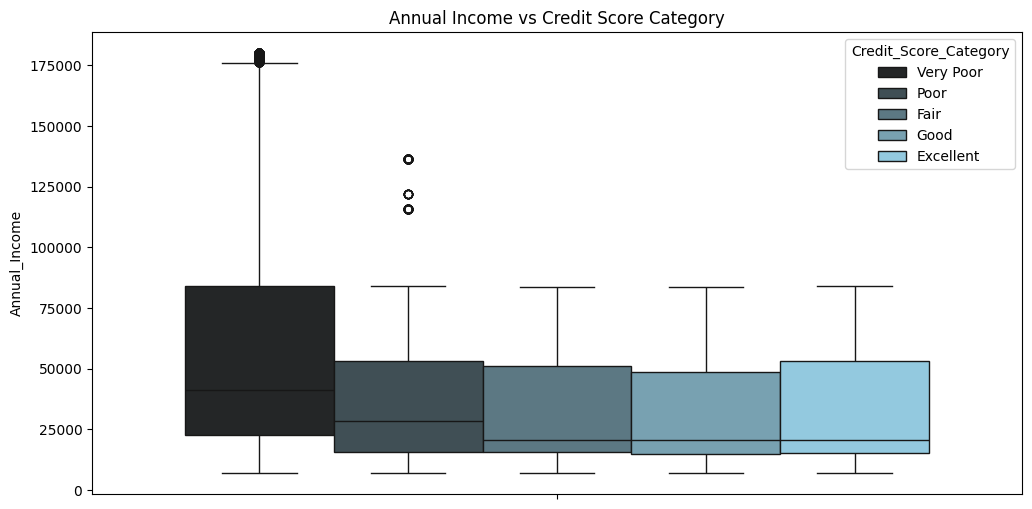

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y= 'Annual_Income', color = 'skyblue', hue = 'Credit_Score_Category')
plt.title('Annual Income vs Credit Score Category')
plt.show()

<ipython-input-1270-c608f38ac6da>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.boxplot(data=df, y= 'Credit_Utilization_Ratio', color = 'skyblue', hue = 'Credit_Score_Category')


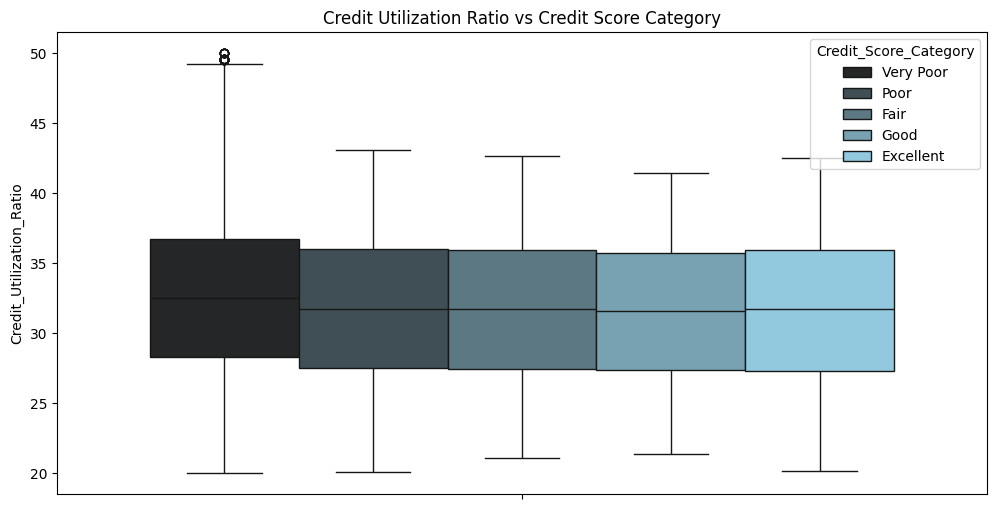

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y= 'Credit_Utilization_Ratio', color = 'skyblue', hue = 'Credit_Score_Category')
plt.title('Credit Utilization Ratio vs Credit Score Category')
plt.show()

<ipython-input-1271-995c4da3e5fa>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.boxplot(data=df, y= 'Outstanding_Debt', color = 'skyblue', hue = 'Credit_Score_Category')


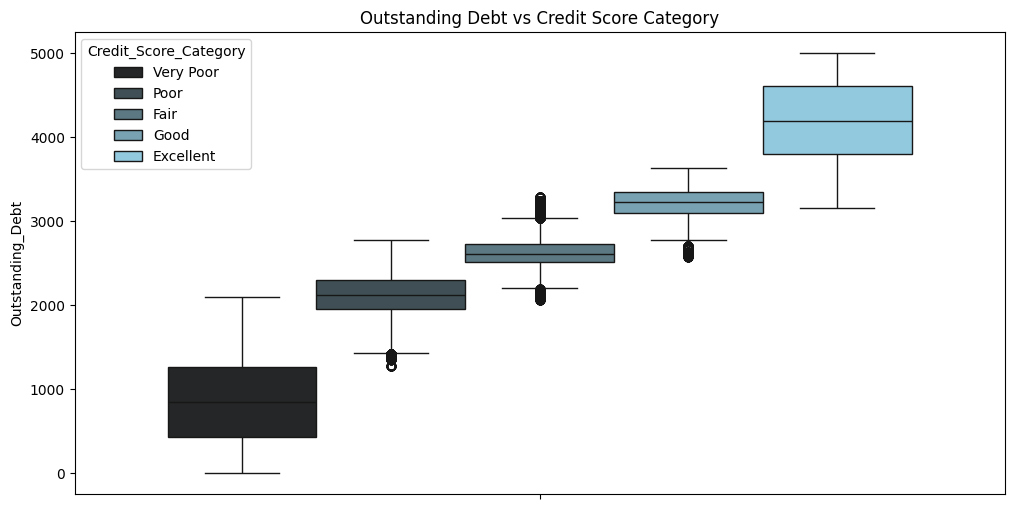

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y= 'Outstanding_Debt', color = 'skyblue', hue = 'Credit_Score_Category')
plt.title('Outstanding Debt vs Credit Score Category')
plt.show()

<ipython-input-1272-fd432c834f21>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df, x='Occupation', color = 'skyblue',hue='Credit_Score_Category')


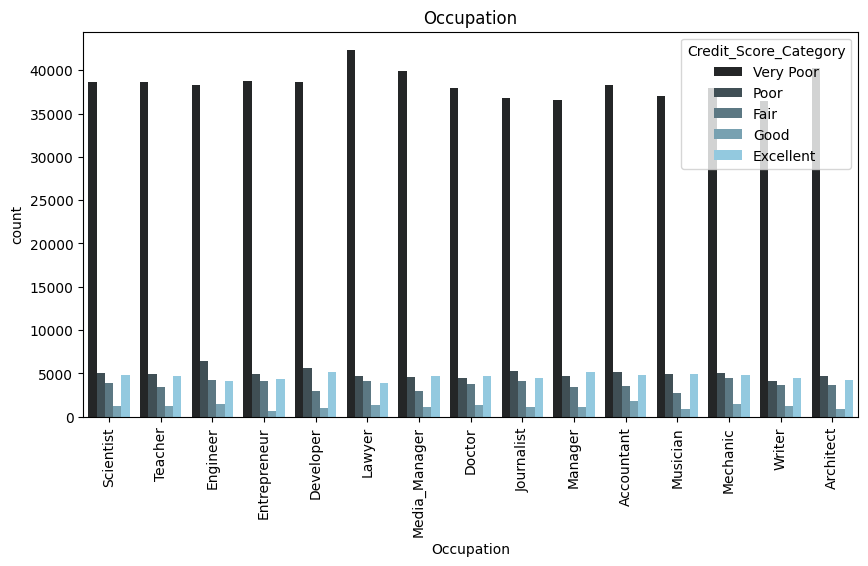

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Occupation')
sns.countplot(data=df, x='Occupation', color = 'skyblue',hue='Credit_Score_Category')
plt.xticks(rotation=90)
plt.show()

<ipython-input-1273-1a78d27a007d>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.boxplot(data=df, y= 'Loan_Count', color = 'skyblue', hue = 'Credit_Score_Category')


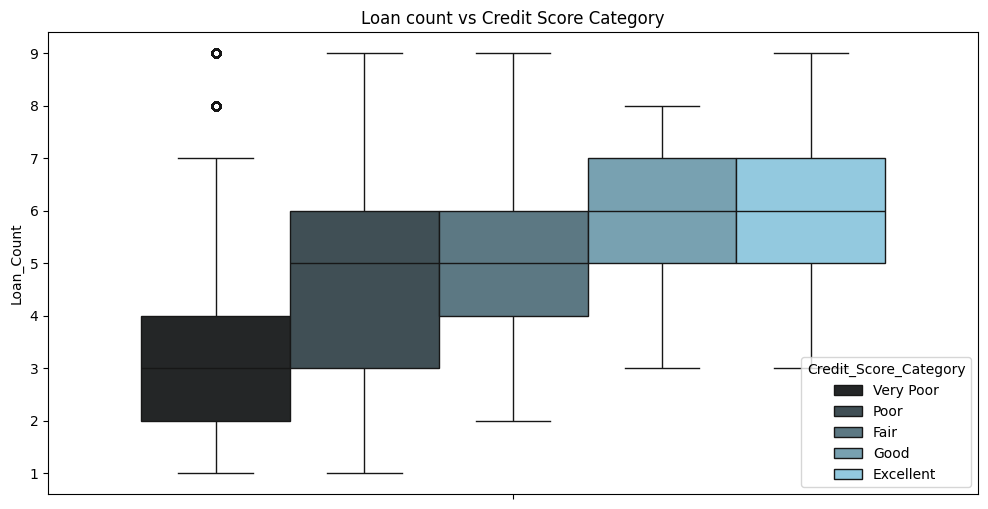

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y= 'Loan_Count', color = 'skyblue', hue = 'Credit_Score_Category')
plt.title('Loan count vs Credit Score Category')
plt.show()

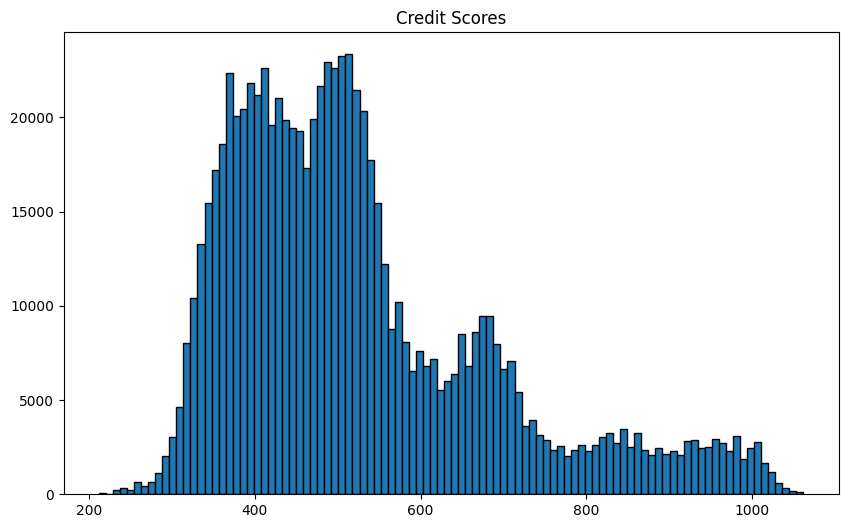

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Credit_Score'], bins=100, edgecolor='black')
plt.title('Credit Scores')
plt.show()

# ***Analysis and Insights***

1. We can observe that 11.4% of people have taken Payday Loans, followed by Credit-Builder Loans at 11.3% and Student Loans at 11.1%.
2. We can observe that 75% of the people are under the age of 42.
3. We can observe that people have a maximum of ten bank accounts and ten credit cards.
4. We can observe that the interest rate ranges between 1% and 34%.
5. We can observe that people have delayed payments for a maximum of 67 days.
6. We can observe that the most frequent credit history age is 19 years and 5 months.
7. We can observe that, approximately 60% of the time, people have paid only the minimum amount.
8. We can observe that 45% of people have a standard credit mix.
9. We can observe that there are more people with the occupation of Lawyer, followed by Engineer and Architect.
10. We can observe that annual income, monthly in-hand salary, amount invested monthly, and monthly balance follow a right-skewed distribution.
11. We can observe that age and annual income have no correlation in the given data.
12. We can observe that even people with higher income have not always paid the minimum amount.
13. We can observe that monthly in-hand salary and annual income, as well as amount invested monthly and monthly balance, are positively correlated.
14. We can observe that interest rate is positively correlated with outstanding debt and credit inquiries.
15. We can observe that credit score is positively correlated with credit history age.
16. We can observe that the average monthly balance is lowest in May and highest in January.
17. We can observe that people with lower income tend to have excellent credit scores.
18. We can observe that people with good credit scores often have substantial debts.
19. We can observe that people in the Lawyer occupation have a higher number of poor credit scores.
20. We can observe that people with excellent credit scores have a higher number of loans.


# ***Recommendation***

1. The data suggests that people in certain occupations (e.g., Lawyers) have poorer credit scores. The model could benefit from incorporating occupation-related data and understanding how certain professions correlate with credit behavior.
2. Since 45% of people have a standard credit mix, the model should consider how different types of credit contribute to the overall score.
3. The observation that people with higher income have not necessarily paid the minimum amount suggests that income alone is not a reliable indicator of creditworthiness.
4. The observation that the average monthly balance is lowest in May and higher in January indicates seasonal trends. We should adjust the model to account for seasonal variations.
5. Positive correlation between income and other financial metrics indicates that higher income usually comes with higher monthly inhand salary and investment amounts. However, this does not always correlate with better credit scores if debt management is not addressed.
6. Incorporating financial management factors such as investment behavior, and debt management into the credit scoring model can provide a more holistic view of an individual's financial health.
7. Provide resources and education to help customers understand how different financial behaviors (e.g., minimum payments, loan types) impact their credit scores. This can help customers make informed decisions and improve their creditworthiness.
